# Sampling Distribution

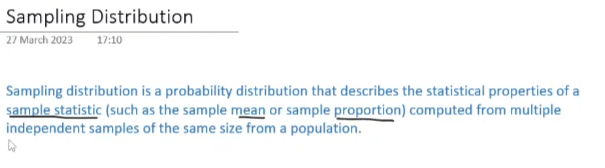

suppose we have the entire population of the INDIA  of their salaries

now take the 50 sample from the entire population and find the mean of their salaries(here we taking mean we can take var,std or else)

now take another 50 sample do the same as above 

do it 100 time 

in the last you will get the 100 mean value of your samples


this is callled as the sampling ditribution of the sample mean



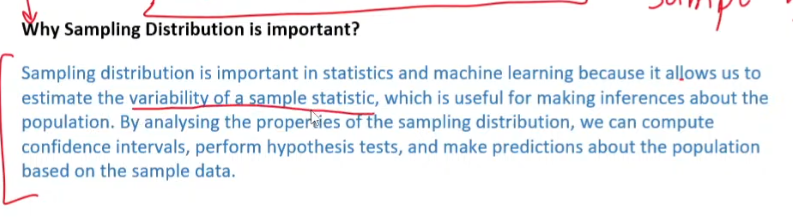

# Central Limit Theorem 

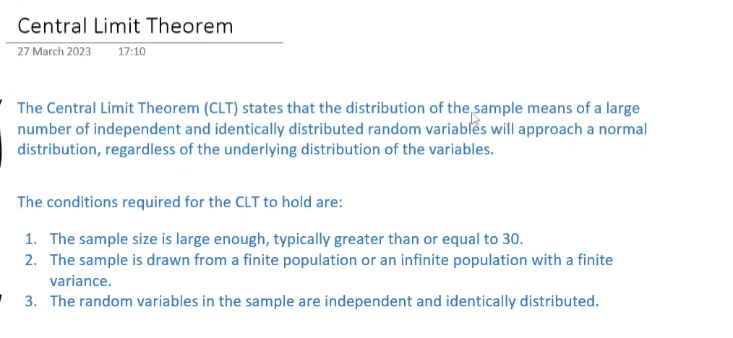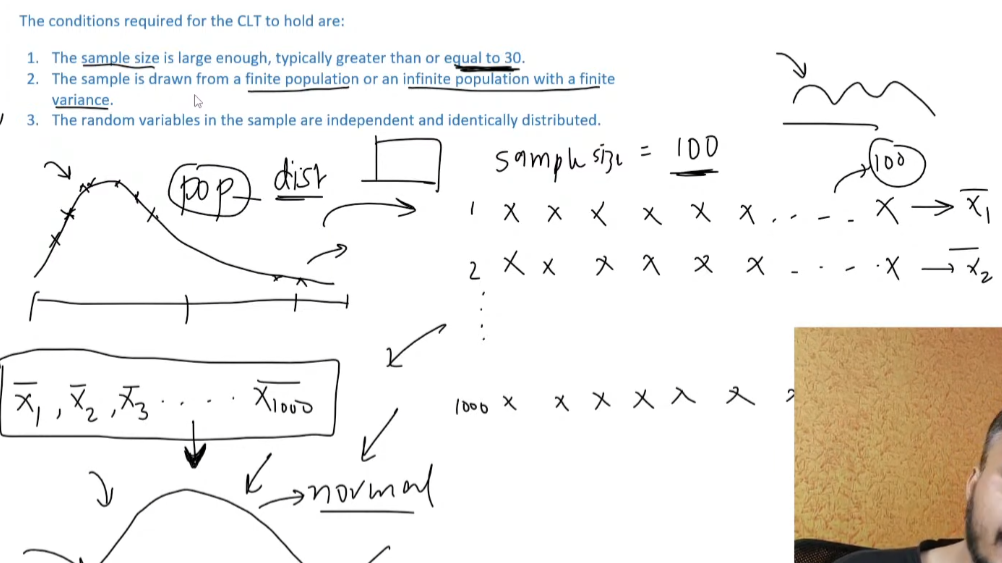

in central limit theorem the distribution of the `sampling distribution` will follow the normal distribution (sampling distribution we calculated above)

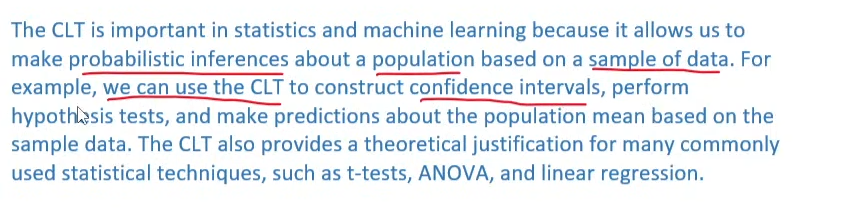

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
from numpy.random import normal
file_name = r"D:\Brainwired\FarmTestDataClean\live_label_merge_data\FinalMergedData28Hz_LiveLable.csv"

live_label_data = pd.read_csv(file_name)
live_label_data['tag']= 5
live_label_data.reset_index(drop=True,inplace=True)
print(live_label_data.shape)
print(live_label_data.date.unique())

data = live_label_data[['x','y','z','secondary']].copy()
data['secondary'].unique()
# data['label'] =  data['secondary'].apply(lambda x: 1 if x=='RUMI' else (2 if x=='EAT' else 0))
data['label'] =  data['secondary'].apply(lambda x: 1 if x=='EAT' else 0)
data['label'].unique()

(516880, 8)
['2024-07-03' '2024-07-04']


array([0, 1], dtype=int64)

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Define window size
window_size = 48  # Number of samples in each window
data['window'] = data.index // window_size




,x,y,z,secondary,label,window
0,9.0024,3.0455,-2.4709,IDLE,0,0
1,8.9258,3.1029,-2.3942,IDLE,0,0
2,8.9066,3.1987,-2.4900,IDLE,0,0
3,8.9641,3.2179,-2.4517,IDLE,0,0
4,8.9449,3.2753,-2.6049,IDLE,0,0
...,...,...,...,...,...,...
516875,8.9258,1.1301,-3.8308,IDLE,0,10768
516876,8.6768,0.3448,-3.5626,IDLE,0,10768
516877,9.2514,-0.5555,-2.4900,IDLE,0,10768
516878,9.6345,-0.1724,-2.1836,IDLE,0,10768


In [14]:
# Calculate the mean of accelerometer data within each window
window_means = data.groupby('window')['x'].mean().values
window_means  # this sampling distribution

array([8.83518125, 9.126875  , 9.26893542, ..., 9.36630833, 9.3691    ,
       9.39385625])

# Apply the central limit theorem

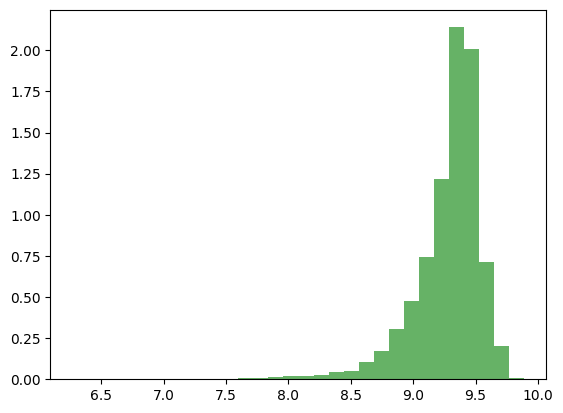

In [15]:
plt.hist(window_means, bins=30, density=True, alpha=0.6, color='g')
plt.show()


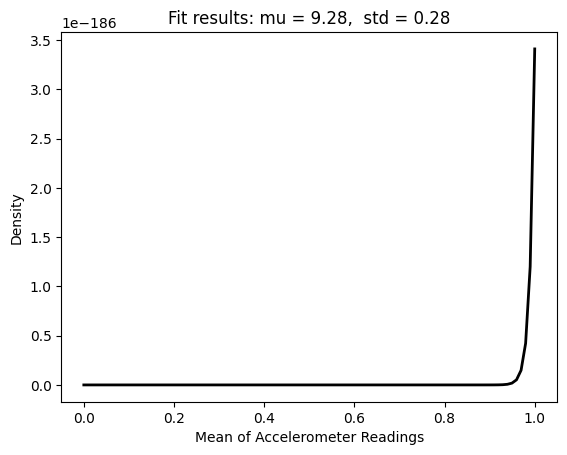

In [16]:
# Plot the theoretical normal distribution
mu, std = np.mean(window_means), np.std(window_means)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5 * ((x - mu) / std) ** 2) / (std * np.sqrt(2 * np.pi))
plt.plot(x, p, 'k', linewidth=2)

title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.xlabel('Mean of Accelerometer Readings')
plt.ylabel('Density')
plt.show()


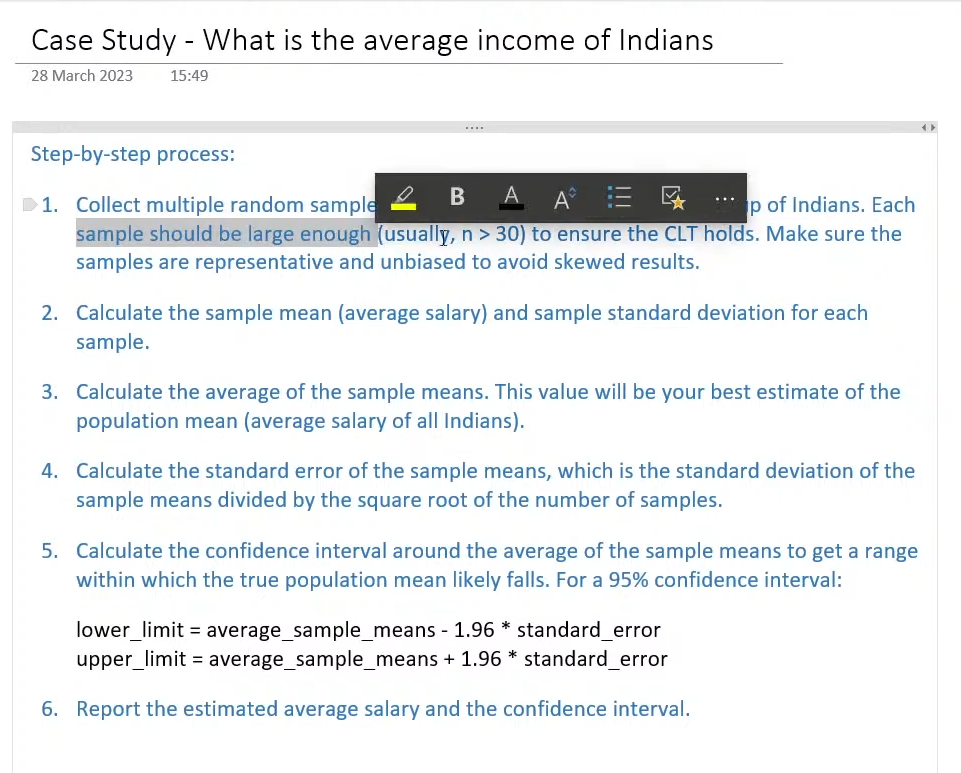

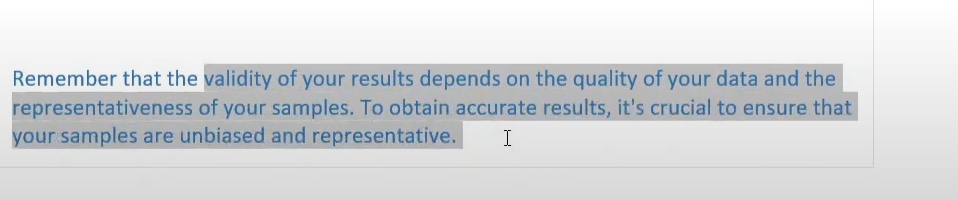